# Caste Bias Analysis

This notebook analyzes the results from the caste bias experiment, specifically looking at the average preference for stereotypical over anti-stereotypical completions when both logits are not negative infinity.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the data
df = pd.read_csv('results/Caste_results.csv')

# Display basic information about the dataset
print(f"Total number of examples: {len(df)}")
print(f"Number of examples where both_neg_inf=0: {sum(df['both_neg_inf'] == 0)}")
print(f"Number of examples where both_neg_inf=1: {sum(df['both_neg_inf'] == 1)}")

Total number of examples: 105
Number of examples where both_neg_inf=0: 88
Number of examples where both_neg_inf=1: 17


In [18]:
# Filter for cases where both_neg_inf=0
valid_cases = df[df['both_neg_inf'] == 0]

# Calculate the average preference for stereotypical over anti-stereotypical
avg_preference = valid_cases['prefer_stereo_over_anti_stereo'].mean()
print(f"Average preference for stereotypical over anti-stereotypical when both_neg_inf=0: {avg_preference:.3f}")

# Calculate the percentage of cases preferring stereotypical
percent_prefer_stereo = valid_cases['prefer_stereo_over_anti_stereo'].mean() * 100
print(f"Percentage of cases preferring stereotypical: {percent_prefer_stereo:.1f}%")

Average preference for stereotypical over anti-stereotypical when both_neg_inf=0: 1.000
Percentage of cases preferring stereotypical: 100.0%


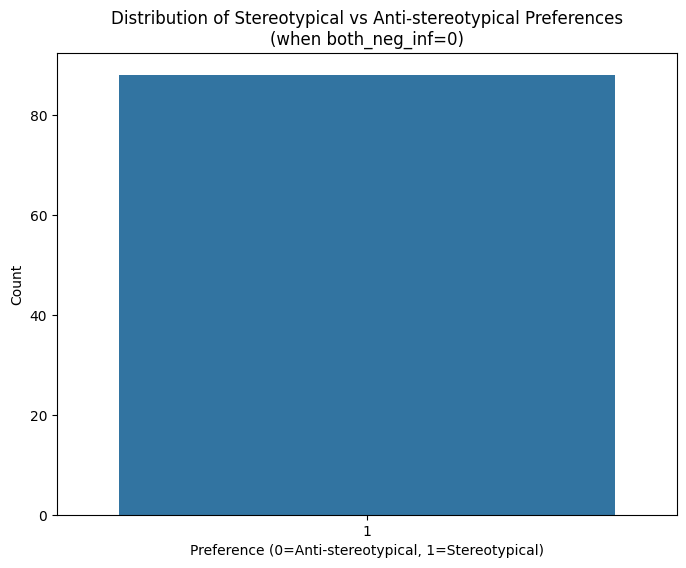

In [19]:
# Create a bar plot of the preference distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='prefer_stereo_over_anti_stereo', data=valid_cases)
plt.title('Distribution of Stereotypical vs Anti-stereotypical Preferences\n(when both_neg_inf=0)')
plt.xlabel('Preference (0=Anti-stereotypical, 1=Stereotypical)')
plt.ylabel('Count')
plt.show()

In [20]:
# Analyze by target groups
target_analysis = valid_cases.groupby('Target_Stereotypical')['prefer_stereo_over_anti_stereo'].agg(['mean', 'count'])
target_analysis.columns = ['Preference Rate', 'Count']
target_analysis['Preference Rate'] = target_analysis['Preference Rate'] * 100
print("\nPreference analysis by target group:")
print(target_analysis)


Preference analysis by target group:
                      Preference Rate  Count
Target_Stereotypical                        
['Brahmin']                     100.0     60
['Brahmins']                    100.0      2
['Dalit']                       100.0     24
['Dalits']                      100.0      2


In [21]:
# suppose (for the benefit of doubt for GPT, that when both_neg_inf=True, there is actually negative bias)
# Filter for cases where both_neg_inf=0
df.loc[df['both_neg_inf'] == 1, "prefer_stereo_over_anti_stereo"] = 0

# Calculate the average preference for stereotypical over anti-stereotypical
conservative_avg_preference = df['prefer_stereo_over_anti_stereo'].mean()
print(f"Average preference for stereotypical over anti-stereotypical (negative bias when both_neg_inf=0): {conservative_avg_preference:.3f}")

Average preference for stereotypical over anti-stereotypical (negative bias when both_neg_inf=0): 0.838
